In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [ ]:
df = pd.read_csv('diamonds_hw.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___). 

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik). 

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

#### Nomor 1:

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df[df['carat'].isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
194,NaN,Premium,E,SI1,61.2,57.0,2777,5.73,5.68,3.49
241,NaN,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03
251,NaN,Good,G,SI2,61.0,61.0,2789,5.94,5.99,3.64
644,NaN,Very Good,F,SI2,63.2,58.0,2843,5.91,5.92,3.74
704,NaN,Fair,J,VS2,65.4,60.0,2854,6.04,6.00,3.94
...,...,...,...,...,...,...,...,...,...,...
50207,NaN,Ideal,F,VS1,60.3,57.0,2227,5.47,5.44,3.29
50559,NaN,Premium,H,SI1,62.7,59.0,2277,5.69,5.73,3.58
53019,NaN,Very Good,H,VS2,58.7,61.0,2599,5.96,5.99,3.51
53234,NaN,Ideal,F,SI1,61.9,57.0,2642,5.88,5.91,3.65


In [ ]:
125 / 53940 * 100

0.23173896922506487

saya memilih metode menghilangkan baris yang mis, karena presentase missing values hanya 0,2%

In [ ]:
df_update = df[~df['carat'].isnull()].reset_index(drop = True)
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53815 entries, 0 to 53814
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53815 non-null  object 
 2   color    53815 non-null  object 
 3   clarity  53815 non-null  object 
 4   depth    53815 non-null  float64
 5   table    53815 non-null  float64
 6   price    53815 non-null  int64  
 7   x        53815 non-null  float64
 8   y        53815 non-null  float64
 9   z        53815 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Nomor 2:

In [ ]:
pd.get_dummies(df_update['clarity'], prefix='Clarity')

,Clarity_I1,Clarity_IF,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
53810,0,0,1,0,0,0,0,0
53811,0,0,1,0,0,0,0,0
53812,0,0,1,0,0,0,0,0
53813,0,0,0,1,0,0,0,0


ada 8 jenis clarity

In [ ]:
urut_clarity = {
    'I1':1,
    'SI2':2,
    'SI1':3,
    'VS2':4,
    'VS1':5,
    'VVS2':6,
    'VVS1':7,
    'IF':8
    }
df_update['Clarity'] = df_update['clarity'].map(urut_clarity)
df_update.drop('clarity', axis='columns', inplace=True)

In [ ]:
df_update.head()

,carat,cut,color,depth,table,price,x,y,z,Clarity
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,2
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,3
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,5
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,4
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,2


karena urut paling bagus ke paling jelek

#### Nomor 3:

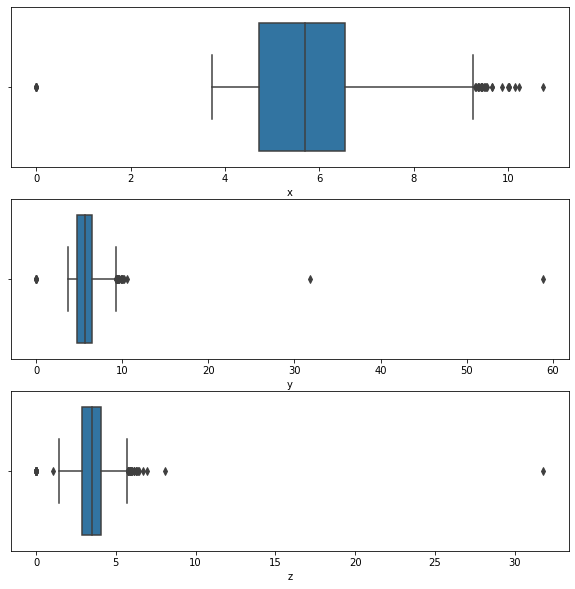

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
sns.boxplot(ax=ax[0], x=df_update['x'])
sns.boxplot(ax=ax[1], x=df_update['y'])
sns.boxplot(ax=ax[2], x=df_update['z'])
plt.show()

In [ ]:
def outlier(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  return['outlier' if (x<Q1-1.5*IQR or x>Q3+1.5*IQR)
                    else 'not outlier' for x in data[column].values]

In [ ]:
df_update['outlier_x'] = outlier(df_update,'x')
df_update['outlier_y'] = outlier(df_update,'y')
df_update['outlier_z'] = outlier(df_update,'z')

In [ ]:
df_update.loc[(df_update['outlier_x'] == 'outlier') | (df_update['outlier_y'] == 'outlier') | (df_update['outlier_z'] == 'outlier')]

,carat,cut,color,depth,table,price,x,y,z,Clarity,outlier_x,outlier_y,outlier_z
2201,1.00,Premium,G,59.1,59.0,3142,6.55,6.48,0.00,2,not outlier,not outlier,outlier
2308,1.01,Premium,H,58.1,59.0,3167,6.66,6.60,0.00,1,not outlier,not outlier,outlier
4780,1.10,Premium,G,63.0,59.0,3696,6.50,6.47,0.00,2,not outlier,not outlier,outlier
5457,1.01,Premium,F,59.2,58.0,3837,6.50,6.47,0.00,2,not outlier,not outlier,outlier
10145,1.50,Good,G,64.0,61.0,4731,7.15,7.04,0.00,1,not outlier,not outlier,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48297,0.51,Very Good,E,61.8,54.7,1970,5.12,5.15,31.80,5,not outlier,not outlier,outlier
49072,0.51,Ideal,E,61.8,55.0,2075,5.15,31.80,5.12,5,not outlier,outlier,not outlier
49438,0.71,Good,F,64.1,60.0,2130,0.00,0.00,0.00,2,outlier,outlier,outlier
49439,0.71,Good,F,64.1,60.0,2130,0.00,0.00,0.00,2,outlier,outlier,outlier


Terdapat 61 data outlier